In [1]:
def zero_coupon_bond(par,y,t):
    return par/(1+y)**t

In [2]:
zero_coupon_bond(100,0.05,5)

78.35261664684589

In [3]:
import math

In [4]:
100/math.exp(0.05*1)

95.12294245007139

In [5]:
class BootstrapYieldCurve():
    def __init__(self):
        self.zero_rates = dict()
        self.instruments = dict()
    
    def add_instrument(self, par, T, coupon, price, compounding_freq = 2):
        self.instruments[T] = (par, coupon, price, compounding_freq)
    
    def get_zero_rates(self):
        self._bootstrap_zero_coupons_()
        self._get_bond_spot_rates_()
        return [self.zero_rates[T] for T in self.get_maturities()]
    
    def get_maturities(self):
        return sorted(self.instruments.keys())
    
    def _bootstrap_zero_coupons_(self):
        for T in self.instruments.keys():
            par, coupon, price, freq = self.instruments[T]
            if coupon == 0:
                self.zero_rates[T] = self._zero_coupon_spot_rate_(par, price, T)
    
    def _get_bond_spot_rates_(self):
        for T in self.get_maturities():
            (par, coupon, price, freq) = self.instruments[T]
            
            if coupon !=0:
                self.zero_rates[T]= self._calculate_bond_spot_rate_(T, instrument)
    
    def _calculate_bond_spot_rate_(self, T, instrument):
        try:
            (par, coupon, price, freq) = self.instruments[T]
            periods = T*freq
            value = price
            per_coupon = coupon / freq
            
            for i in range(int(periods)-1):
                t = (i+1)/float(freq)
                spot_rate = self.zero_rates[t]
                discounted_coupon = per_coupon*math.exp(-spot_rate*t)
                value -= discounted_coupon
            
            last_period = int(periods)/float(freq)
            spot_rate = - math.log(value / (par+per_coupon))/last_period
            return spot_rate
        
        except:
            print("Error: spot rate not found for T = %s" %t)
    
    def _zero_coupon_spot_rate_(self, par, price, T):
        spot_rate = math.log(par/price)/T
        return spot_rate

In [6]:
yield_curve = BootstrapYieldCurve()

In [7]:
yield_curve.add_instrument(100, 1, 0, 96.18)

In [8]:
yield_curve.add_instrument(100, 2, 0, 91.7)

In [9]:
yield_curve.add_instrument(100, 3, 0, 87.09)

In [10]:
yield_curve.add_instrument(100, 4, 0, 80.57)

In [11]:
yield_curve.add_instrument(100, 5, 0, 75.96)

In [12]:
yield_curve.add_instrument(100, 6, 0, 70.09)

In [13]:
yield_curve.add_instrument(100, 7, 0, 65.43)

In [14]:
yield_curve.add_instrument(100, 8, 0, 61.04)

In [15]:
yield_curve.add_instrument(100, 9, 0, 58.11)

In [16]:
yield_curve.add_instrument(100, 10, 0, 55.69)

In [17]:
y = yield_curve.get_zero_rates()

In [18]:
x = yield_curve.get_maturities()

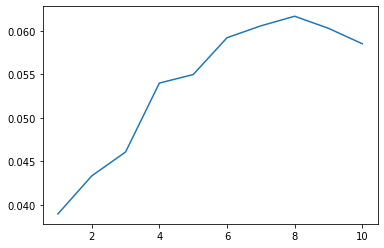

In [19]:
import matplotlib.pyplot as plt
plt.plot(x,y)